In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import lib

In [2]:
url = "https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data"

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
response.headers

{'Date': 'Tue, 22 Feb 2022 14:09:30 GMT', 'Server': 'mw1330.eqiad.wmnet', 'X-Content-Type-Options': 'nosniff', 'P3p': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-Language': 'en', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'Last-Modified': 'Tue, 22 Feb 2022 14:00:21 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Encoding': 'gzip', 'Age': '7854', 'X-Cache': 'cp3060 miss, cp3050 hit/13', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front", host;desc="cp3050"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Report-To': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'NEL': '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fraction": 0.0}', 'Permissions-Policy': 'interest-cohort=()', 'Set-

In [6]:
response.headers["Content-Type"]

'text/html; charset=UTF-8'

In [7]:
data = BeautifulSoup(response.text, "html.parser")

In [8]:
table = data.find_all("table", {"class":"wikitable sortable tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2"})

In [9]:
table

[<table class="wikitable sortable tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2" style="text-align: right; margin-top: 0;">
 <caption><a href="/wiki/COVID-19_pandemic" title="COVID-19 pandemic">COVID-19 pandemic</a> by <a href="/wiki/COVID-19_pandemic_by_country_and_territory" title="COVID-19 pandemic by country and territory">location</a><sup class="reference" id="cite_ref-Template:COVID-19_data_1-0"><a href="#cite_note-Template:COVID-19_data-1">[1]</a></sup>
 </caption>
 <tbody><tr class="sticky-row">
 <th class="unsortable">
 </th>
 <th scope="col">Location
 </th>
 <th scope="col">Cases
 </th>
 <th scope="col">Deaths
 </th></tr>
 <tr class="sorttop static-row-header">
 <td data-sort-value="World" style="text-align: center;"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/th

In [10]:
df = pd.read_html(str(table))

In [11]:
df = pd.DataFrame(df[0])

In [12]:
df

,Unnamed: 0,Location,Cases,Deaths
0,NaN,World[a],425940668,5890818
1,NaN,European Union[b],105045619,994998
2,NaN,United States,78529099,935990
3,NaN,India,42851929,512344
4,NaN,Brazil,28258458,644918
...,...,...,...,...
213,NaN,Marshall Islands,7,—
214,NaN,"Saint Helena, Ascension and Tristan da Cunha",4,—
215,NaN,Cook Islands,2,—
216,NaN,Federated States of Micronesia,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1 non-null      object
 1   Location    218 non-null    object
 2   Cases       218 non-null    object
 3   Deaths      218 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB


In [14]:
df["Cases"] = pd.to_numeric(df["Cases"], errors="coerce")
df["Deaths"] = pd.to_numeric(df["Deaths"], errors="coerce")

In [15]:
df.loc[df["Unnamed: 0"].isnull()==False]

,Unnamed: 0,Location,Cases,Deaths
217,.mw-parser-output .reflist{font-size:90%;margi...,.mw-parser-output .reflist{font-size:90%;margi...,NaN,NaN


In [16]:
df = df.drop(index=[0,1,217], columns="Unnamed: 0")
df

,Location,Cases,Deaths
2,United States,78529099.0,935990.0
3,India,42851929.0,512344.0
4,Brazil,28258458.0,644918.0
5,France,22356662.0,132731.0
6,United Kingdom,18703228.0,160750.0
...,...,...,...
212,Vanuatu,15.0,1.0
213,Marshall Islands,7.0,NaN
214,"Saint Helena, Ascension and Tristan da Cunha",4.0,NaN
215,Cook Islands,2.0,NaN


In [17]:
df_top = df.loc[df["Cases"]>5000000]
df_top

,Location,Cases,Deaths
2,United States,78529099.0,935990.0
3,India,42851929.0,512344.0
4,Brazil,28258458.0,644918.0
5,France,22356662.0,132731.0
6,United Kingdom,18703228.0,160750.0
7,Russia,15297628.0,339319.0
8,Germany,13805197.0,121607.0
9,Turkey,13589511.0,92719.0
10,Italy,12494459.0,153190.0
11,Spain,10858000.0,98462.0


<function matplotlib.pyplot.show(close=None, block=None)>

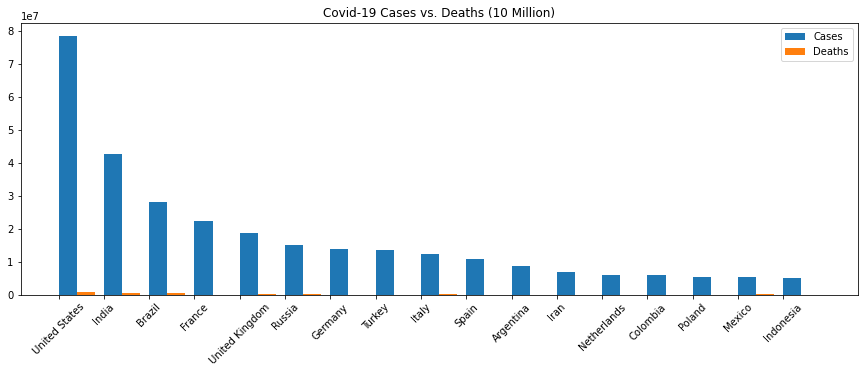

In [44]:
xpos = np.arange(len(df_top["Location"]))
plt.xticks(xpos,df_top["Location"], rotation=45)
plt.bar(xpos+0.2, df_top["Cases"], label="Cases", width=0.4)
plt.bar(xpos+0.6, df_top["Deaths"], label="Deaths", width=0.4)
plt.rcParams["figure.figsize"]=(15,5)
plt.title("Covid-19 Cases vs. Deaths (10 Million)")
plt.yticks()
plt.legend()
plt.show